# Target  

    In the last experiment we alredy achived our target, but we noticed some overfitiing of model, In order to avoid that overfitiing we will introduce data augmentation, the target is to get even better model, which can either avoid overfitting and keep the results or make results even better 

# Result 

    We are able to avoid the overfitting, as well as we are getting the best accuracy among all the experiments we have done so far 
    test_accuracy -> 99.50
    train_accuracy -> 99.47
    parameters -> 7,824

# Analysis 

    1. This part of assignment was the most painful one, because not every augmentation helps us to solve the problem, we have to check the results in miss-classified images and take the decision what augmentation we should introduce. 
    2. Augmentation also works as regularization, so we need to make sure we are using it safely, else it can even drop the accuracy. 
    3. Right augmentation ---------- Right medicine 

CODE BLOCK: 1

In [1]:
# Initialized Logger
import torch
import torch.optim as optim
from torchvision import datasets
from torchsummary import summary
from model import Net
from utils import data_transformation,get_device, \
                  fit_model, plot_accuracy_report, \
                  show_random_results, plot_misclassified, \
                  calculate_accuracy_per_class

CODE BLOCK: 2

In [2]:
# CUDA?
device = get_device()
print("Available Device :: ", device)

INFO:utils:device: cuda


Available Device ::  cuda


CODE BLOCK: 3

In [3]:
transformation_matrix = {"image_size":(28,28),
                         "random_rotation_angle":(-5.0, 5.0),
                         "mean_of_data":(0.1307,),
                         "std_of_data": (0.3081,),
                         "center_crop_size": (24,24),
                         "center_crop_probability" : 0.1,
                         }

dataloader_kwargs = {'batch_size': 64, 'shuffle': True, 'num_workers': 1, 'pin_memory': True}


train_transforms, test_transforms = data_transformation(transformation_matrix)
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader = torch.utils.data.DataLoader(train_data, **dataloader_kwargs)
test_loader = torch.utils.data.DataLoader(test_data, **dataloader_kwargs)

INFO:utils:transformation Details ::: 


100%|██████████| 9912422/9912422 [00:00<00:00, 108190347.33it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 24082642.91it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 26355489.91it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 16022311.83it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



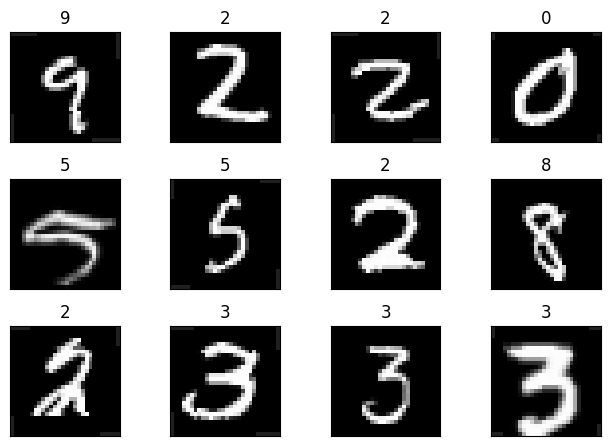

In [4]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader))

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [5]:
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 4, 26, 26]              36
              ReLU-2            [-1, 4, 26, 26]               0
       BatchNorm2d-3            [-1, 4, 26, 26]               8
           Dropout-4            [-1, 4, 26, 26]               0
            Conv2d-5           [-1, 10, 24, 24]             360
              ReLU-6           [-1, 10, 24, 24]               0
       BatchNorm2d-7           [-1, 10, 24, 24]              20
           Dropout-8           [-1, 10, 24, 24]               0
         MaxPool2d-9           [-1, 10, 12, 12]               0
           Conv2d-10            [-1, 8, 12, 12]              80
             ReLU-11            [-1, 8, 12, 12]               0
      BatchNorm2d-12            [-1, 8, 12, 12]              16
          Dropout-13            [-1, 8, 12, 12]               0
           Conv2d-14            [-1, 4,

In [6]:
training_parameters = {"learning_rate":0.01,
                       "momentum":0.9,
                       "step_size":6,
                       "gamma":0.3,
                       "max_lr":0.017,
                       "num_epochs":15
                       }
train_losses, test_losses, train_acc, test_acc = fit_model(model,training_parameters,train_loader,test_loader,device)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.0207 Batch_id=937 Accuracy=93.42: 100%|██████████| 938/938 [00:53<00:00, 17.44it/s]


Test set: Average loss: 0.0471, Accuracy: 9866/10000 (98.66%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.0114 Batch_id=937 Accuracy=98.24: 100%|██████████| 938/938 [00:54<00:00, 17.32it/s]


Test set: Average loss: 0.0404, Accuracy: 9885/10000 (98.85%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0449 Batch_id=937 Accuracy=98.65: 100%|██████████| 938/938 [00:54<00:00, 17.21it/s]


Test set: Average loss: 0.0292, Accuracy: 9904/10000 (99.04%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0073 Batch_id=937 Accuracy=98.76: 100%|██████████| 938/938 [00:54<00:00, 17.31it/s]


Test set: Average loss: 0.0284, Accuracy: 9909/10000 (99.09%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0274 Batch_id=937 Accuracy=98.92: 100%|██████████| 938/938 [00:54<00:00, 17.11it/s]


Test set: Average loss: 0.0267, Accuracy: 9906/10000 (99.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0150 Batch_id=937 Accuracy=99.01: 100%|██████████| 938/938 [00:54<00:00, 17.31it/s]


Test set: Average loss: 0.0299, Accuracy: 9908/10000 (99.08%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 7


Train: Loss=0.0174 Batch_id=937 Accuracy=99.28: 100%|██████████| 938/938 [00:53<00:00, 17.42it/s]


Test set: Average loss: 0.0186, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 8


Train: Loss=0.0107 Batch_id=937 Accuracy=99.35: 100%|██████████| 938/938 [00:53<00:00, 17.40it/s]


Test set: Average loss: 0.0184, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 9


Train: Loss=0.0174 Batch_id=937 Accuracy=99.36: 100%|██████████| 938/938 [01:01<00:00, 15.15it/s]


Test set: Average loss: 0.0197, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 10


Train: Loss=0.0079 Batch_id=937 Accuracy=99.42: 100%|██████████| 938/938 [00:54<00:00, 17.18it/s]


Test set: Average loss: 0.0194, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 11


Train: Loss=0.0034 Batch_id=937 Accuracy=99.41: 100%|██████████| 938/938 [00:53<00:00, 17.43it/s]


Test set: Average loss: 0.0183, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 3.0000e-03.
Epoch 12


Train: Loss=0.0105 Batch_id=937 Accuracy=99.46: 100%|██████████| 938/938 [00:54<00:00, 17.26it/s]


Test set: Average loss: 0.0179, Accuracy: 9939/10000 (99.39%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 13


Train: Loss=0.0078 Batch_id=937 Accuracy=99.47: 100%|██████████| 938/938 [00:53<00:00, 17.46it/s]


Test set: Average loss: 0.0164, Accuracy: 9950/10000 (99.50%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 14


Train: Loss=0.0018 Batch_id=937 Accuracy=99.55: 100%|██████████| 938/938 [00:55<00:00, 17.03it/s]


Test set: Average loss: 0.0171, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 9.0000e-04.
Epoch 15


Train: Loss=0.0128 Batch_id=937 Accuracy=99.51: 100%|██████████| 938/938 [00:53<00:00, 17.55it/s]


Test set: Average loss: 0.0177, Accuracy: 9943/10000 (99.43%)

Adjusting learning rate of group 0 to 9.0000e-04.


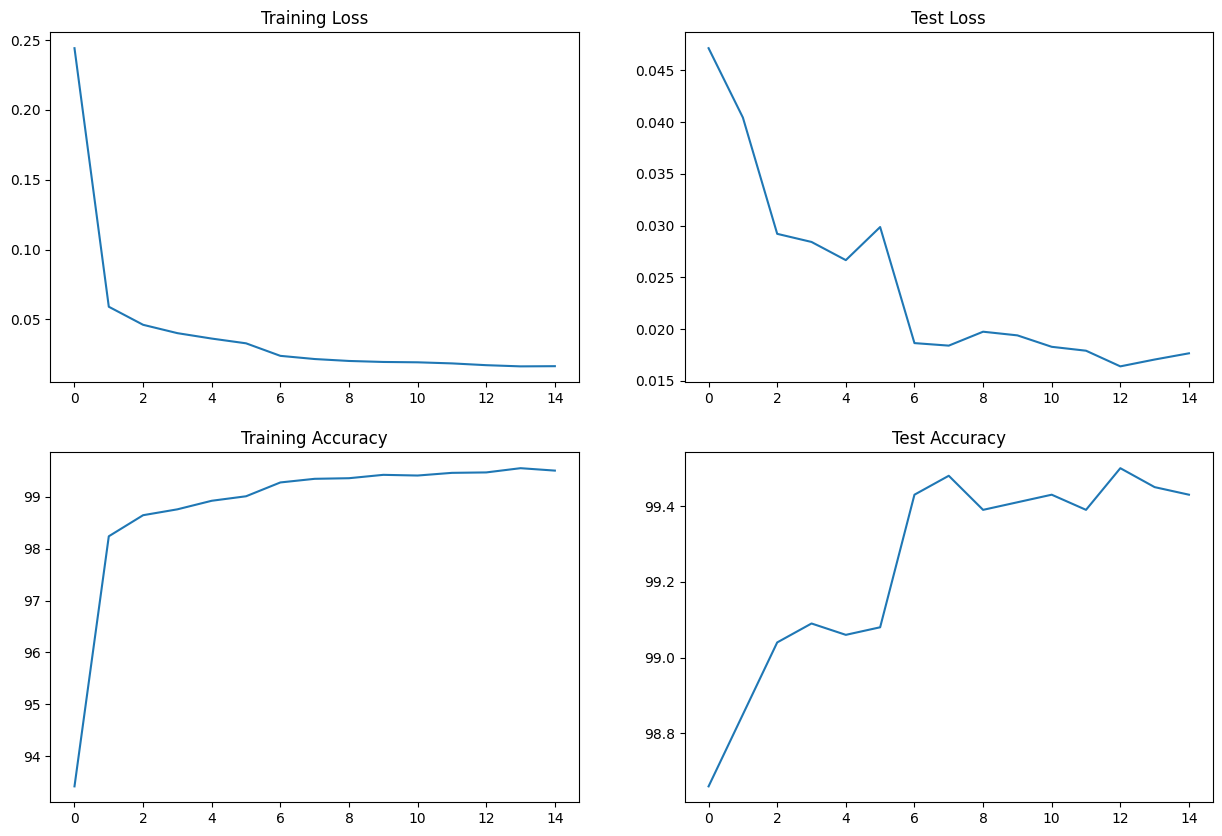

In [7]:
plot_accuracy_report(train_losses, test_losses, train_acc, test_acc)

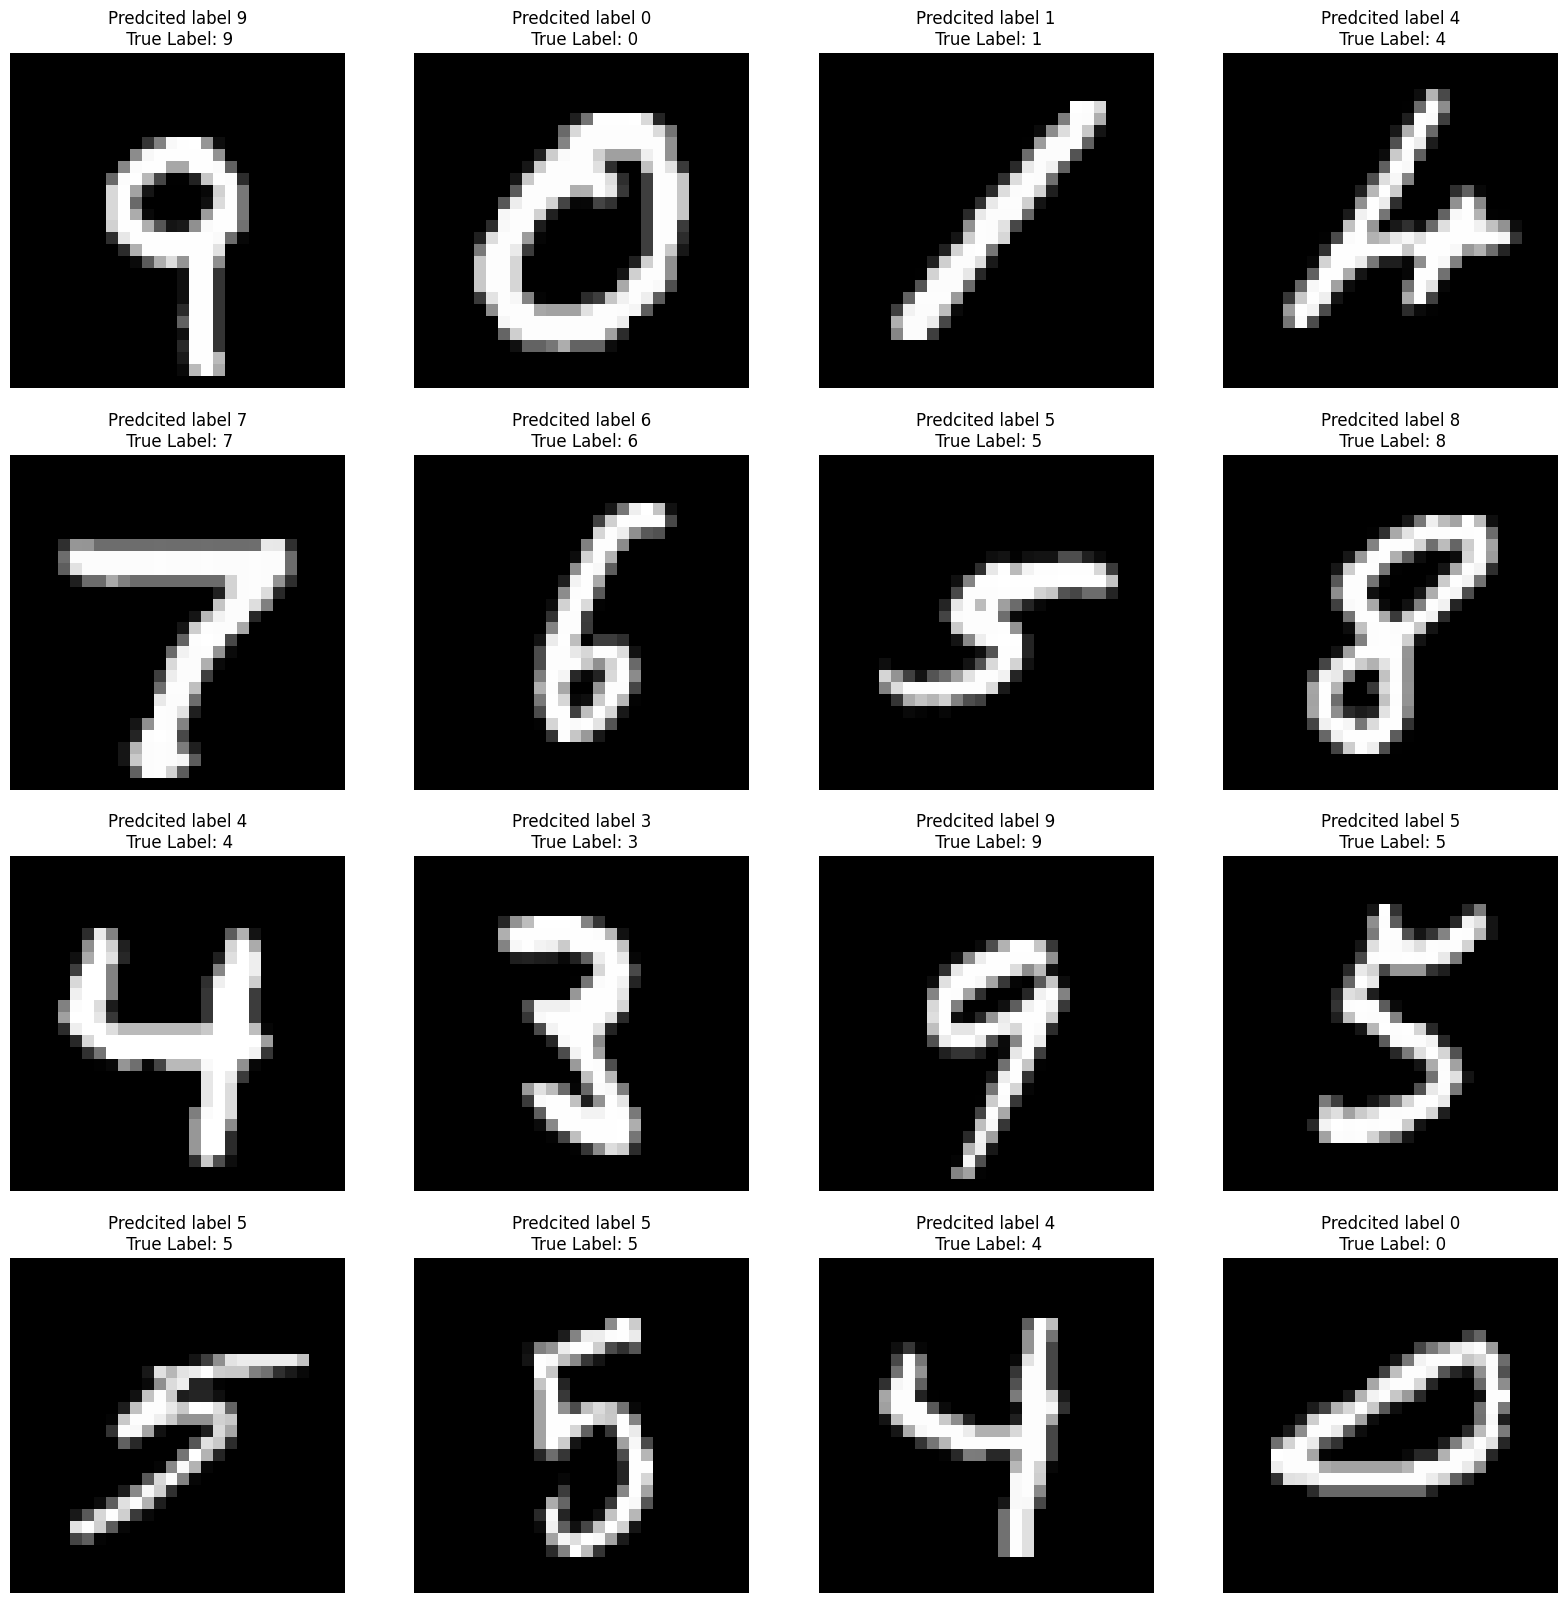

In [8]:
grid_size = (4,4)
show_random_results(test_loader,grid_size,model,device)

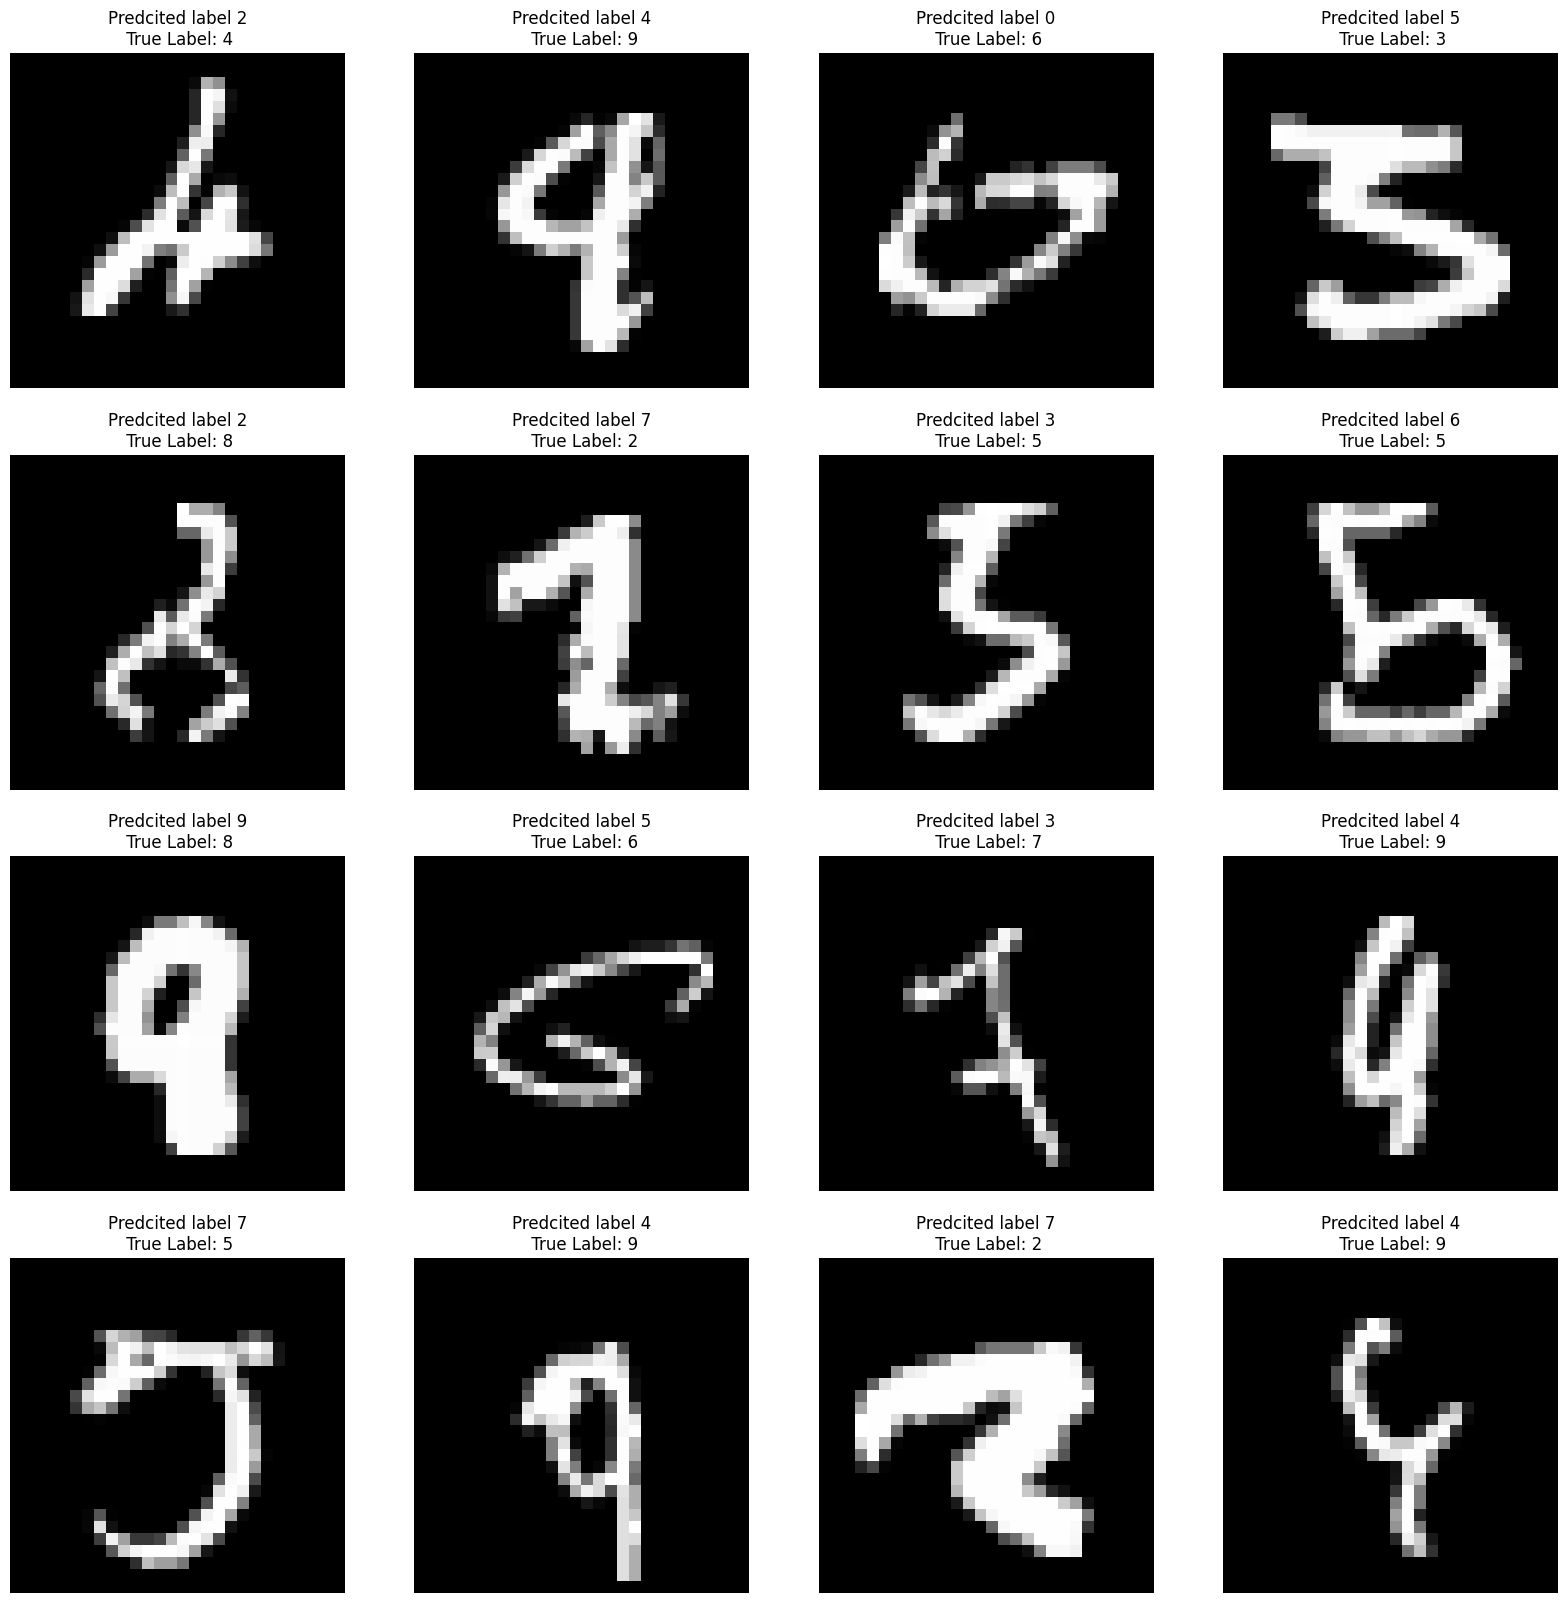

In [9]:
grid_size = (4,4)
plot_misclassified(model,grid_size,test_loader,device)

Accuracy of 0 - zero : 99 %
Accuracy of 1 - one : 100 %
Accuracy of 2 - two : 99 %
Accuracy of 3 - three : 99 %
Accuracy of 4 - four : 99 %
Accuracy of 5 - five : 99 %
Accuracy of 6 - six : 98 %
Accuracy of 7 - seven : 99 %
Accuracy of 8 - eight : 99 %
Accuracy of 9 - nine : 99 %


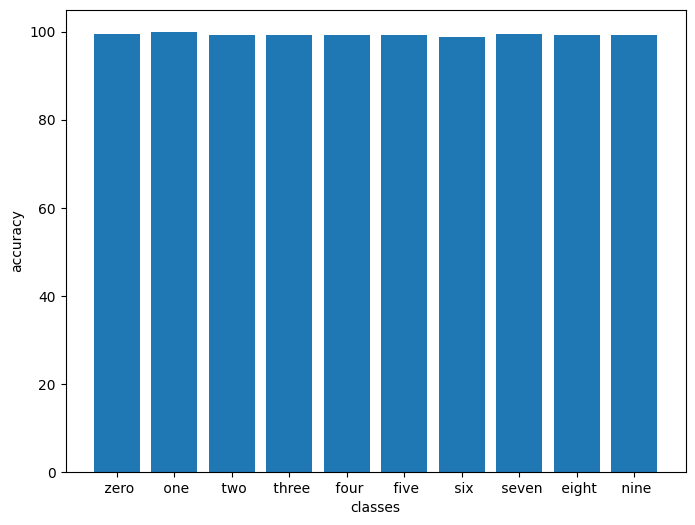

In [10]:
calculate_accuracy_per_class(model,device,test_loader,test_data)